In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#For train Data
dfTrain = pd.read_csv('train.csv')
column_data1 = dfTrain['radius']
column_data2 = dfTrain['height']
y_train = dfTrain['surface_area']
X_train = np.column_stack((column_data1, column_data2))

#For test Data
dfTest = pd.read_csv('test.csv')
column_data3 = dfTest['radius']
column_data4 = dfTest['height']
y_test = dfTest['surface_area']
X_test = np.column_stack((column_data3, column_data4))

In [11]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with linear activation
])

model.compile(optimizer='adam', loss='mean_squared_error')  # Compiling

history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=0.1, verbose=0)  # Training

In [12]:
Y_pred = model.predict(X_test)  # Evaluating the model

# evaluation
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, Y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r_squared:.2f}')

63/63 [==============================] - 0s 763us/step
Mean Squared Error (MSE): 1118.43
Root Mean Squared Error (RMSE): 33.44
R-squared (R²): 1.00


In [13]:
#checking results on unseen data
unseen_data = pd.DataFrame({
    'radius' : [101,150,290,44,60],
    'height' : [10,100,120,80,360]
})

data_predict = model.predict(unseen_data) #prediction on unseen data

unseen_data['predicted_surface_area'] = data_predict
unseen_data['True Surface Area (Calculated Through Formula)'] = [70440.79,235619.45,747070.73,34281.06,158336.27]
unseen_data

1/1 [==============================] - 0s 27ms/step


,radius,height,predicted_surface_area,True Surface Area (Calculated Through Formula)
0,101,10,1551131.125,70440.79
1,150,100,3158317.000,235619.45
2,290,120,5415790.500,747070.73
3,44,80,1311912.875,34281.06
4,60,360,3568749.750,158336.27


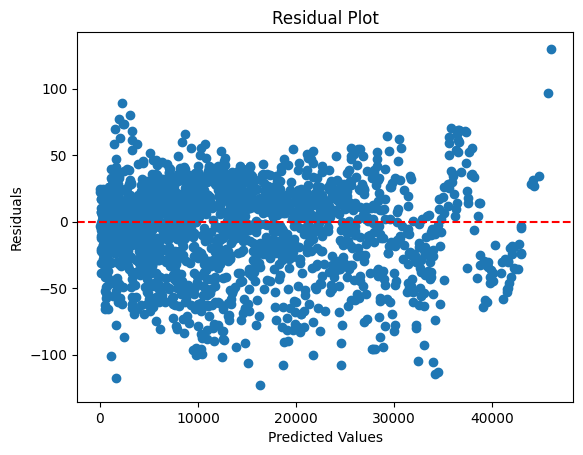

In [14]:
import matplotlib.pyplot as plt
Y_pred = Y_pred.reshape(-1)
residuals = y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')